In [68]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [69]:
# purchasing data
data = pd.read_csv('Social_Network_Ads.csv', delimiter = ';')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [70]:
data.info()
# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [71]:
# Encoding categorical data
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
LE = LabelEncoder()
data['Gender'] = LE.fit_transform(data['Gender'])

In [72]:
# drop user id column 
data = data.drop('User ID', axis=1)

In [73]:
data_scale = data[['Age', 'EstimatedSalary']]

In [74]:
data_no_scale = data[['Gender', 'Purchased']]

In [75]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data_scale = sc.fit_transform(data_scale)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [76]:
data_scale = pd.DataFrame(data_scale)

In [77]:
#concat scaled and not scaled again
data = pd.concat([data_scale, data_no_scale], axis=1)

In [78]:
data.columns = ['Age', 'EstimatedSalary', 'Gender', 'Purchased']

In [79]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in split.split(data, data["Gender"]):
    data_train = data.loc[train_index]
    data_test = data.loc[test_index]

In [80]:
X_train = data_train[['Age', 'EstimatedSalary', 'Gender']]
y_train = data_train['Purchased']
X_test = data_test[['Age', 'EstimatedSalary', 'Gender']]
y_test = data_test['Purchased']

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [82]:
model = LogisticRegression()

In [83]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [84]:
y_predict = model.predict(X_train)

In [85]:
y_predict_test = model.predict(X_test)

In [86]:
accuracy_train = accuracy_score(y_predict, y_train)
accuracy_train

0.8375

In [87]:
accuracy_test = accuracy_score(y_predict_test, y_test)
accuracy_test

0.7875

# Confusion matrix, Presision, Recall and F1score

In [88]:
from sklearn.metrics import confusion_matrix
conf_train = confusion_matrix(y_train, y_predict)
conf_train

array([[192,  12],
       [ 40,  76]], dtype=int64)

In [89]:
conf_test = confusion_matrix(y_test, y_predict_test)
conf_test

array([[50,  3],
       [14, 13]], dtype=int64)

In [90]:
from sklearn.metrics import precision_score, recall_score
precision_train = precision_score(y_train, y_predict)
precision_train

0.8636363636363636

In [91]:
precision_test = precision_score(y_test, y_predict_test)
precision_test

0.8125

In [92]:
recall_train = recall_score(y_train, y_predict)
recall_train

0.6551724137931034

In [93]:
recall_test = recall_score(y_test, y_predict_test)
recall_test

0.48148148148148145

In [94]:
from sklearn.metrics import f1_score
f1_score_train = f1_score(y_train, y_predict)
f1_score_train

0.7450980392156864

In [95]:
f1_score_test = f1_score(y_test, y_predict_test)
f1_score_test

0.6046511627906976

In [104]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(model, X_train, y_train, cv=3,
                             method="predict_proba")
y_scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[0.54832174, 0.45167826],
       [0.13388772, 0.86611228],
       [0.81272852, 0.18727148],
       [0.30072266, 0.69927734],
       [0.81415153, 0.18584847],
       [0.58554748, 0.41445252],
       [0.56398745, 0.43601255],
       [0.24598165, 0.75401835],
       [0.61924602, 0.38075398],
       [0.68870762, 0.31129238],
       [0.86354445, 0.13645555],
       [0.46214533, 0.53785467],
       [0.62769313, 0.37230687],
       [0.92257189, 0.07742811],
       [0.79103331, 0.20896669],
       [0.41594936, 0.58405064],
       [0.28816491, 0.71183509],
       [0.55566397, 0.44433603],
       [0.82474892, 0.17525108],
       [0.88476406, 0.11523594],
       [0.47147219, 0.52852781],
       [0.89907168, 0.10092832],
       [0.74955521, 0.25044479],
       [0.28441314, 0.71558686],
       [0.59244397, 0.40755603],
       [0.67741326, 0.32258674],
       [0.67197922, 0.32802078],
       [0.95012065, 0.04987935],
       [0.7038706 , 0.2961294 ],
       [0.30626384, 0.69373616],
       [0.

In [105]:
y_scores = y_scores[:, 1]

In [106]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

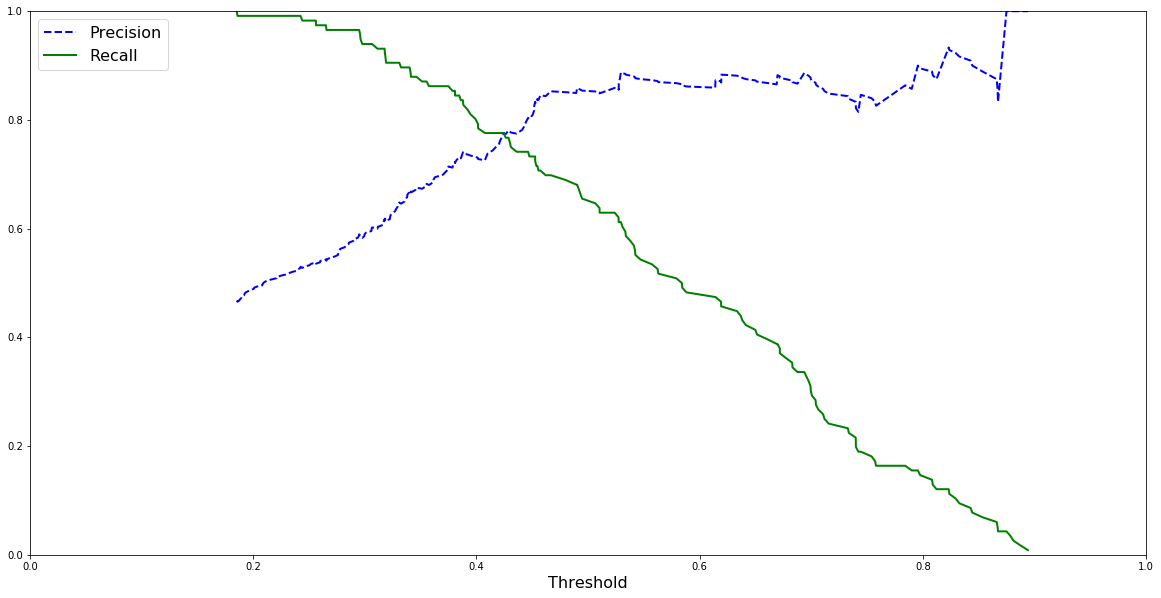

In [110]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(20, 10))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([0, 1])
#save_fig("precision_recall_vs_threshold_plot")
plt.show()